Import packages

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt # For plotting images
import numpy as np
import cv2

## Load dataset
- Tensiorflow already contains the MNIST dataset which can be loaded using Keras
#### Dataset contains:
- 60,000 training samples
- 10,000 testing samples

In [2]:
# Load the handwritten characters mnist data from Keras. All are 28x28 images of digits 0 to 9
mnist = tf.keras.datasets.mnist

#### Split MNIST data into training and testing datasets

In [3]:
# Splitting dataset into training and testing datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape # Check current data shape, should show 60,000 imgs, with 28x28 size

(60000, 28, 28)

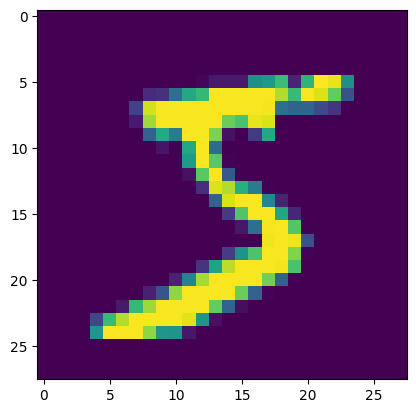

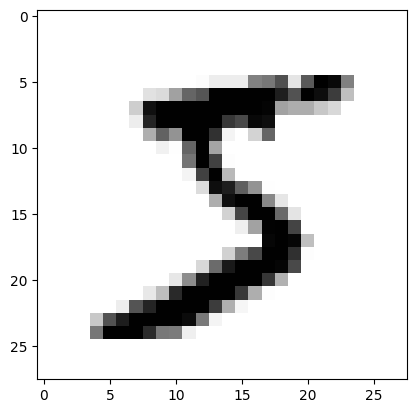

In [8]:
# Check the graph to see how the data images look like
plt.imshow(x_train[0])
# Show the graph
plt.show()
# But we aren't sure of the the img is colour or binary imgs so change the img configuration to binary (black and white)
# cm.binary revereses the pixels (background should actually be black and digit white)
plt.imshow(x_train[0], cmap= plt.cm.binary)

#### Take a look at value of each pixel
- Black pixels have a value of 0
- White has 255
- Closer to black = near 0, vice versa
- This is before normalization

In [9]:
# We can see that imgs are in gray level (1 channel only -> 0 to 255), so the img is not coloured (RGB)
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### Normalize and pre-process the data
- Normalization in machine learning is the process of translating data into the range [0, 1] (or any other range) or simply transforming data onto the unit sphere
- Some machine learning algorithms benefit from normalization and standardization, particularly when Euclidean distance is used.
- Divide all values by 255 since the values range from 0 to 255
  - If we have white pixel, it has the value of 255, so 255/255 = 1
  - Black has 0 so 0/255 = 0. 
  - Closer to 0 means close to black, closer to 1 means closer to white pixel
  - Now all values are 0 to 1 instead of 0 to 255

#### Before Normalization

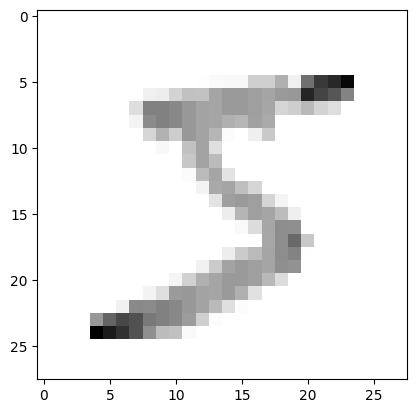

In [10]:
# Right now the imgs have values only ranging from 0 to 255
# We normalize the x_train data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

#### After Normalization

In [11]:
# We can now see that all values are now normalized
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
# Verify the corresponding labels are inside y_train
# y_train contains the labels, x_train contains the data
print(y_train[0])

5


#### Resize image to make it fit convolutional networks

In [15]:
IMG_SIZE = 28
# Increasing 1 dimension for kernel (aka filter) operation
x_train_reshape = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # -1 corresponds to the 60,000. Maximum size in python minus 1. The 1 is to increase the dimension by 1 b/c we need the extra dimension to perform convlutional operations
x_test_reshape = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
print("Training sample dimension ", x_train_reshape.shape)
print("Testing sample dimension ", x_test_reshape.shape)

Training sample dimension  (60000, 28, 28, 1)
Testing sample dimension  (10000, 28, 28, 1)


## Creating the Deep Neural Network
- Training on 60,000 samples of MNIST handwritten dataset
- Using dequential model to connect the layers
- Eg. layers such as dropout, activation, flatten etc

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D


#### Create our neural network
- Using 64 kernels (aka filters) - think of each filter as a neuron
    - Each have different matrix
    - Each is sized 3x3
1. Extract the features
2. Drop all negative values
3. Reduce the size and only propogate the maximum value to the next layer
4. Create as many convolutional networks as I want
5. Flatten the layer. Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector. The flattened matrix is fed as input to the fully connected layer to classify the image.

In [21]:
model = Sequential() # We will be sequentially connecting all our layers

### First convolutional layer - only have to mention the input layer size for the first convolutional layer; (60000, 28 , 28, 1) 28 - 3 + 1 = 26x26
model.add(Conv2D(64, (3,3), input_shape = x_train_reshape.shape[1:])) # Number of filter (aka kernels) is 64 and each filter is 3x3 sized. Skipping 0 ([1:]) bc we only need the "28, 28, 1" part from "(60000, 28, 28, 1)"
# Activation function
model.add(Activation("relu")) # To make it non-linear. Drop all values < 0, only move values > 0 to the second layer
# Maxpooling
model.add(MaxPooling2D(pool_size = (2,2))) # Pool size is 2x2. Keep only a single maximum value of 2x2 matrix, and drop the rest

### Second convolutional layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

### Third convolutional layer
model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

### Fully connected (aka Dense) layer 1 - 20x20 = 400
model.add(Flatten()) # Flatten the layer before creating the fully connected layer - convert 2D to 1D eg. 20x20 = 400
model.add(Dense(64)) # 64 neurons, all connected. So EACH of the 400 neurons will connect to EACH of the 64 neurons
model.add(Activation("relu")) # activation layer

### Dense layer 2
model.add(Dense(32)) # reducing the neurons, we are reaching towards 10 neurons b/c in total we only have 10 digits
model.add(Activation("relu"))

### Dense layer 3
model.add(Dense(10)) # this last dense layer must = 10
model.add(Activation("softmax")) # activation function of the last layer must be softmax or sigmoidal etc. Softmax give the class probabilities

#### Show summary of the model
- We can see that we are starting with convolutional 2D layer
    - 26 from 28 - 3 + 1

In [22]:
# Show summary of the model
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_3 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_4 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [23]:
print("Total training samples: ", len(x_train_reshape))

Total training samples:  60000


In [25]:
# Compile model before training
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"]) # improve acuray so used 'accuracy' for metrics

## Training the model
- x_train_reshape -> data
- y_train -> label -> the digits (10 labels for digits 0 to 9)
- epochs -> iterations
- validation_split -> split ratio
    - in this case 70% of the 60000 data is for training, and 30% for validation (to validate itself during training)
- If validation accuracy < accuracy, then problem is overfitting.

In [26]:
# Training the model
model.fit(x_train_reshape, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 56s 41ms/step - loss: 0.3404 - accuracy: 0.8938 - val_loss: 0.1643 - val_accuracy: 0.9514
Epoch 2/5
1313/1313 [==============================] - 56s 42ms/step - loss: 0.1054 - accuracy: 0.9683 - val_loss: 0.0890 - val_accuracy: 0.9713
Epoch 3/5
1313/1313 [==============================] - 55s 42ms/step - loss: 0.0767 - accuracy: 0.9763 - val_loss: 0.0809 - val_accuracy: 0.9758
Epoch 4/5
1313/1313 [==============================] - 64s 48ms/step - loss: 0.0599 - accuracy: 0.9811 - val_loss: 0.0675 - val_accuracy: 0.9794
Epoch 5/5
1313/1313 [==============================] - 64s 49ms/step - loss: 0.0490 - accuracy: 0.9846 - val_loss: 0.0622 - val_accuracy: 0.9805


#### Evalute the trained model on the testing MNIST data set
- The 10000 testing dataset from earlier

In [27]:
test_loss, test_acc = model.evaluate(x_test_reshape, y_test)
print("Test loss on 10,000 test samples: ", test_loss)
print("Validation accuracy on 10,000 test samples: ", test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0539 - accuracy: 0.9851
Test loss on 10,000 test samples:  0.05391313508152962
Validation accuracy on 10,000 test samples:  0.9850999712944031


// Can save model here after training and evaluation

### Make predictions
- Predict what each digit in the 10,000 testing sample dataset is

In [29]:
# Make predictions to see if we are going in the right direction
predictions = model.predict([x_test_reshape])
print(predictions) # Prints all the probabilities of each class - from softmax

313/313 [==============================] - 3s 10ms/step
[[7.19723126e-09 5.15986494e-06 2.30568548e-06 ... 9.99871731e-01
  1.32414968e-08 5.96569953e-06]
 [5.00336569e-03 1.80034931e-05 9.94647205e-01 ... 9.52944811e-06
  1.15647126e-04 2.04590128e-06]
 [1.47341581e-07 9.99983132e-01 2.00282116e-07 ... 8.27606982e-06
  6.34331343e-07 1.14971222e-07]
 ...
 [1.11634715e-10 1.42915610e-07 6.82185863e-10 ... 7.57547070e-07
  1.26424723e-07 8.76808281e-06]
 [9.43562043e-07 1.31177941e-07 4.95805486e-09 ... 5.00707870e-07
  2.03884265e-04 9.28619841e-07]
 [7.99043555e-05 3.37622367e-07 4.58133445e-06 ... 1.71923062e-07
  2.11891711e-05 2.85599917e-08]]


In [30]:
# The maximum value of the array of probability of each class is the "answer"
print(np.argmax(predictions[0])) # So the prediction thinks that the first sample is digit 7

7


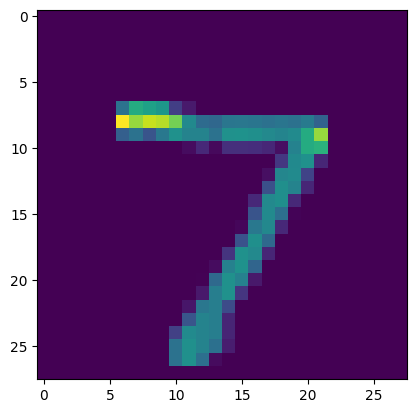

In [32]:
# Check the first sample image to see what digit it is
plt.imshow(x_test[0])

## Testing on my own dataset

In [42]:
input_img = cv2.imread("dataset/eight.png")
input_img.shape # 3 = 3 colour channels, RGB

(312, 273, 3)

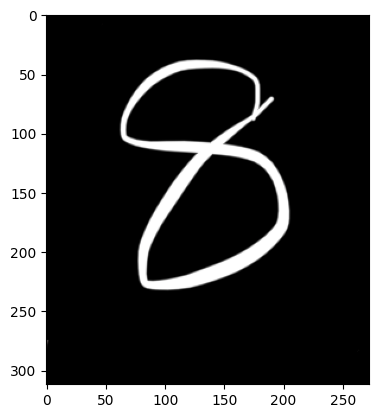

In [43]:
plt.imshow(input_img) # Show the image

In [44]:
# Convert it to gray image first bc currently the img is in colour
gray = cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
gray.shape # Now the third parameter "3" is gone, bc only 1 colour channel (representing only black and white, no longer RGB (3))

(312, 273)

In [47]:
# Size of our neural network is 28x28 so we have to resize the img
# Right now our img is 300x250 so need to resize
input_img = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)
input_img.shape

# Normalize to convert to 0 to 1 scaling
input_img = tf.keras.utils.normalize(input_img, axis = 1) # Divide all by 255

# Modify size for kernel operation of convolutional layer - add addional dimension
input_img = np.array(input_img).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
input_img.shape

# Make prediction
predictions = model.predict(input_img)
print(np.argmax(predictions)) # Check if it's working for our single image

1/1 [==============================] - 0s 146ms/step
8
